In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
import os

# modify the path below accordingly
PATH = "/content/drive/MyDrive/compvision/gesture_face_features"

sys.path.append(os.path.join(PATH, "code"))

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# importing .py files from /code
from utils import *
from cam import *
from tsne import TSNECluster
# from hand_extraction import extract_hand_mp

In [25]:
import os
import numpy as np
# import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl

In [26]:
# Main configurations

available_models = [
  "VGG19",
  "ResNet50",
  "InceptionV3",
  "EfficientNetB0",
  "EfficientNetB1",
  "EfficientNetB6",
]

available_letters = ["A", "H", "L", "N", "O", "P", "R"]

participants = {
  0: list(range(2914, 2951)),
  1: list(range(2871, 2904)),
  2: list(range(2323, 2356)),
  3: list(range(2285, 2314)),
  4: list(range(1646, 1675)),
  5: list(range(1510 , 1544)),
}

test_imgs = [2919, 2871, 2325, 2287, 1646, 1539]

In [27]:
# Secondary configurations
letter = available_letters[0]
img_type = 'sign'

# Model configurations
model_name = available_models[3]
input_dim = (224, 224) # default
model = None
include_top = True
debug = False
last_conv_layer_name = None

In [28]:
# loading model
if model_name == 'ResNet50':
  from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
  model = ResNet50(include_top=include_top)
  last_conv_layer_name = 'conv5_block3_out'
elif model_name == 'VGG19':
  # No GAP Layer
  from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
  model = VGG19(include_top=include_top)
  last_conv_layer_name = 'block5_conv4'
elif model_name == 'InceptionV3':
  from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
  model = InceptionV3(include_top=include_top)
  last_conv_layer_name = 'mixed10'
  input_dim = (299, 299)
elif model_name == 'EfficientNetB0':
  from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input, decode_predictions
  model = EfficientNetB0(include_top=include_top)
  last_conv_layer_name = 'top_conv'

if debug:
  print(model.summary())

print(f"{model.name} loaded")

efficientnetb0 loaded


In [29]:
# Loading data
folder_paths, img_paths = get_paths(os.path.join(PATH, 'samples', img_type), letter)
imgs = load_imgs(img_paths)

32 images loaded


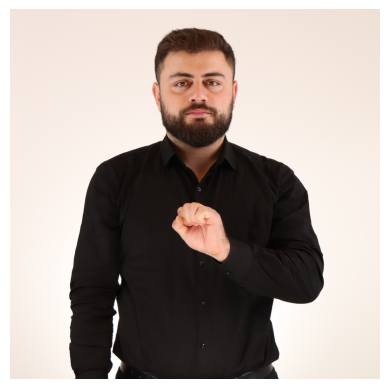

In [38]:
# Testing
img = imgs[10]
plt.imshow(img)
plt.axis('off')
plt.show()

# Grad-CAM

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted: [('n04350905', 'suit', 6.874021)]


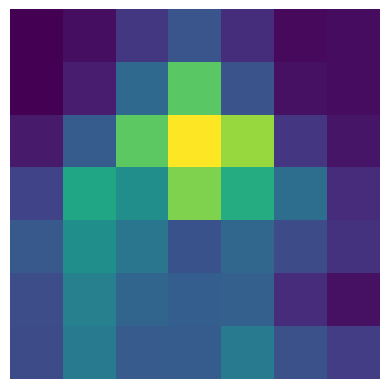

In [57]:
img_array = np.array(img.resize(input_dim))
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

preds = model.predict(input)
print("Predicted:", decode_predictions(preds, top=1)[0])

heatmap = get_gradcam_heatmap(img_array, model, input_dim, last_conv_layer_name)

show_img(heatmap)

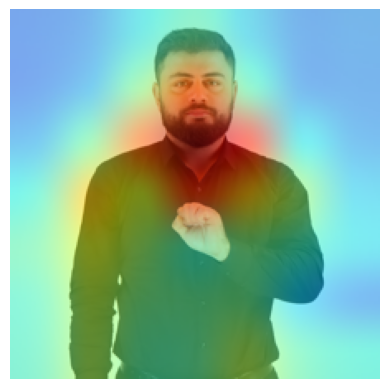

In [61]:
superimposed = superimpose(img_array, heatmap)
show_img(superimposed)